<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd

### Creating some data to view and fit





In [ ]:
X = np.array([-7.,-4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

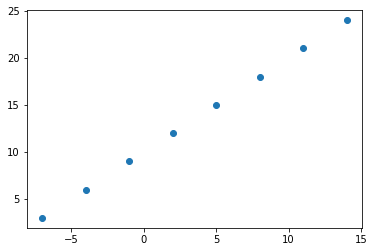

In [ ]:
plt.scatter(X,y)

### Check shapes

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
from keras import backend as K 

In [ ]:
K.clear_session()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(optimizer='sgd', loss = 'mae', metrics='mae')

In [ ]:
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 569ms/step - loss: 13.5142 - mae: 13.5142
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4631 - mae: 13.4631
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4120 - mae: 13.4120
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3606 - mae: 13.3606
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3085 - mae: 13.3085
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2554 - mae: 13.2554
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2008 - mae: 13.2008
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1444 - mae: 13.1444
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0857 - mae: 13.0857
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 13.0244 - mae: 13.0244
Epoch 11/100
1/1 [==============================] - 0s 8

In [ ]:
model.predict([17.])

array([[24.416449]], dtype=float32)

### Improving our model
- **Creating model** add more layers, neurons and change activation function
- **Compiling model** change optimisation function and learning rate
- **Fitting model** increase data and numbers of epochs

In [ ]:
K.clear_session()

In [ ]:
model2 = tf.keras.Sequential([
            tf.keras.layers.Dense(1),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(1)
])

In [ ]:
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics='mae')

In [ ]:
model2.fit(X,y,epochs=100)
 

Epoch 1/100
1/1 [==============================] - 0s 419ms/step - loss: 13.3249 - mae: 13.3249
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8682 - mae: 12.8682
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.4012 - mae: 12.4012
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9252 - mae: 11.9252
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4332 - mae: 11.4332
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9207 - mae: 10.9207
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4855 - mae: 10.4855
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0767 - mae: 10.0767
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6389 - mae: 9.6389
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1674 - mae: 9.1674
Epoch 11/100
1/1 [==============================] - 0s 5ms/s

In [ ]:
model2.predict([16.])

array([[26.17649]], dtype=float32)

### Evaluating model
Visualise:
- data
- model itself
- training of a model, how does it performes
- predictions

In [ ]:
X_ = tf.range(-100.,100., 4.)

In [ ]:
X_, X_.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>, TensorShape([50]))

In [ ]:
len(X_)

50

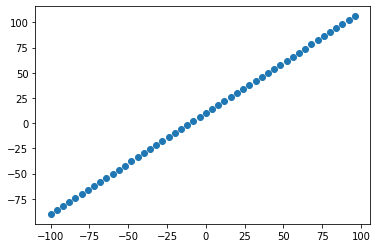

In [ ]:
y_ = X_+10
plt.scatter(X_, y_)

In [ ]:
# tf.random.set_seed(52)
# X_ = tf.random.shuffle(X_, seed = 52)
# y_ = tf.random.shuffle(y_, seed = 52)

Ususally we split data to 
- training set 70-80%
- validating set (model get tuned on this set) 10-15%
- testing set 10-15%

In [ ]:
X_train = X_[:40]
X_test = X_[40:]
y_train = y_[:40] 
y_test = y_[40:] 

In [ ]:
X_train, y_train, len(X_test), len(y_test)

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>,
 10,
 10)

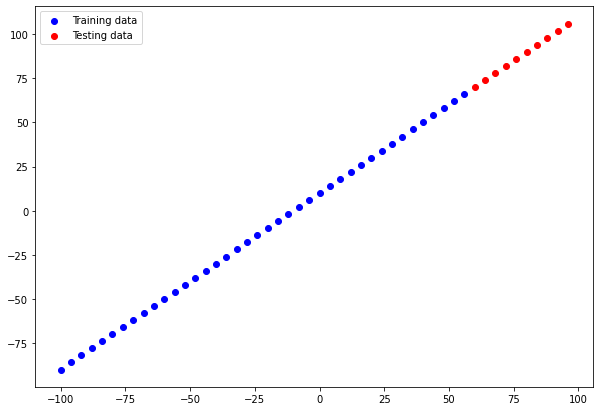

In [ ]:
#Plotting our data sets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label = 'Training data')
plt.scatter(X_test, y_test, c='r', label = 'Testing data')
plt.legend()


In [ ]:
K.clear_session()

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, input_shape = [1], name = 'my_input_layer'),
                             tf.keras.layers.Dense(10, activation='relu', name = 'my_hidden_layer'),
                             tf.keras.layers.Dense(1, name = 'my_output_layer')
                            ], name = 'my_model')


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics='mae')

In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input_layer (Dense)       (None, 100)               200       
_________________________________________________________________
my_hidden_layer (Dense)      (None, 10)                1010      
_________________________________________________________________
my_output_layer (Dense)      (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = 0) #verbose=0 we dont have any output

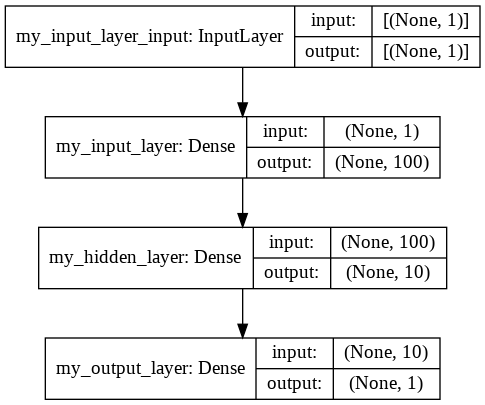

In [ ]:
plot_model(model=model, show_shapes=True)# to_file='model.png')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def plot_results(X_train = X_train, 
                 y_train = y_train,
                 X_test = X_test,
                 y_test = y_test,
                 y_pred = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train, c='b', label = 'Training data')
  plt.scatter(X_test, y_test, c='g', label = 'Testing data')
  plt.scatter(X_test,y_pred, c='r', label = 'Predictions')
  plt.legend()

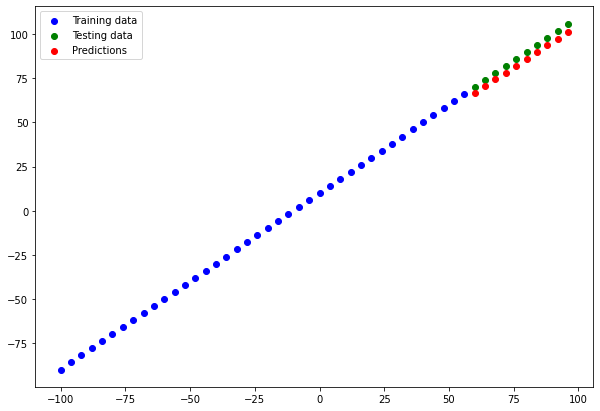

In [ ]:
  plot_results()

### Evaluating our model with regression evaluation metrics
Main metrics for regression problem:
- MAE Mean absolute error
- MSE Mean square error when larger errors are more significant than small errors
- Huber combination of MSE and MAE, less sensitive to outliers

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 4.0187 - mae: 4.0187


[4.018731594085693, 4.018731594085693]

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred)
#We should have one value, dimentions are wrong

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([21.354507, 17.601685, 14.589836, 12.318927, 10.788986, 10.018507,
       10.      , 10.722452, 12.185864, 14.390219], dtype=float32)>

In [ ]:
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

In [ ]:
#Change y_pred to tensor to have same shape, to be able to calculate mae
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 66.64549 ],
       [ 70.497894],
       [ 74.35027 ],
       [ 78.20268 ],
       [ 82.05507 ],
       [ 85.90746 ],
       [ 89.75986 ],
       [ 93.61226 ],
       [ 97.46466 ],
       [101.31703 ]], dtype=float32)>

In [ ]:
#squeeze y_pred(remove 1 dimention)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 66.64549 ,  70.497894,  74.35027 ,  78.20268 ,  82.05507 ,
        85.90746 ,  89.75986 ,  93.61226 ,  97.46466 , 101.31703 ],
      dtype=float32)>

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0187316>

In [ ]:
#MSE
tf.metrics.mean_squared_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=16.32995>

In [ ]:
def mse(y_test, y_pred):
  y_pred = tf.squeeze(tf.constant(y_pred))
  return tf.metrics.mean_squared_error(y_test, y_pred)
def mae(y_test, y_pred):
  y_pred = tf.squeeze(tf.constant(y_pred))
  return tf.metrics.mean_absolute_error(y_test, y_pred)

### Experiments to improve our error
- Use more data
- more complex model
- try longer

3 experiments:
1. Same model
2. Lower learning rate 100 epochs
3. Lower learning rate 500 epochs

In [ ]:
#model1
tf.random.set_seed(42)

In [ ]:
K.clear_session()

In [ ]:
model1 = tf.keras.Sequential([tf.keras.layers.Dense(100, input_shape = [1], name = 'my_input_layer'),
                             tf.keras.layers.Dense(10, activation='relu', name = 'my_hidden_layer'),
                             tf.keras.layers.Dense(1, name = 'my_output_layer')
                            ], name = 'my_model1')

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics='mae')

In [ ]:
model1.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
y1_pred = model1.predict(X_test)
len(y1_pred)

10

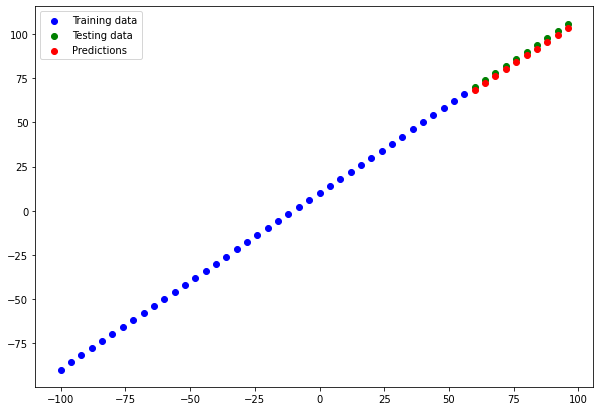

In [ ]:
plot_results(y_pred=y1_pred)

In [ ]:
mae_1 = mae(y_test, y1_pred)
mse_1 = mse(y_test, y1_pred)

In [ ]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(100, input_shape = [1], name = 'my_input_layer'),
                             tf.keras.layers.Dense(10, activation='relu', name = 'my_hidden_layer'),
                             tf.keras.layers.Dense(1, name = 'my_output_layer')
                            ], name = 'my_model2')

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mae', metrics='mae')

In [ ]:
model2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
y2_pred = model2.predict(X_test)

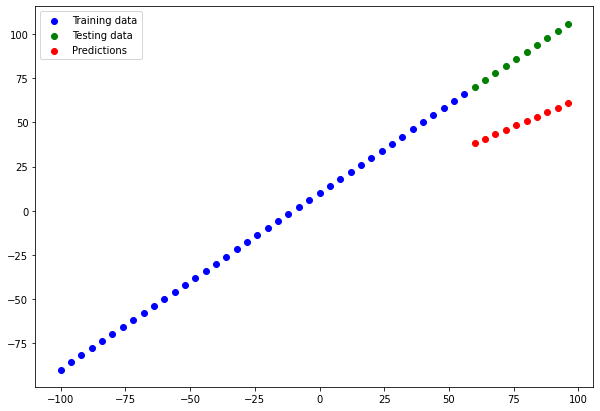

In [ ]:
plot_results(y_pred=y2_pred)

In [ ]:
mae_2 = mae(y_test, y2_pred)
mse_2 = mse(y_test, y2_pred)

In [ ]:
model3 = tf.keras.Sequential([tf.keras.layers.Dense(100, input_shape = [1], name = 'my_input_layer'),
                             tf.keras.layers.Dense(10, activation='relu', name = 'my_hidden_layer'),
                             tf.keras.layers.Dense(1, name = 'my_output_layer')
                            ], name = 'my_model3')

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics='mae')

In [ ]:
model3.fit(X_train, y_train, epochs = 500, verbose = 0)

In [ ]:
y3_pred = model3.predict(X_test)

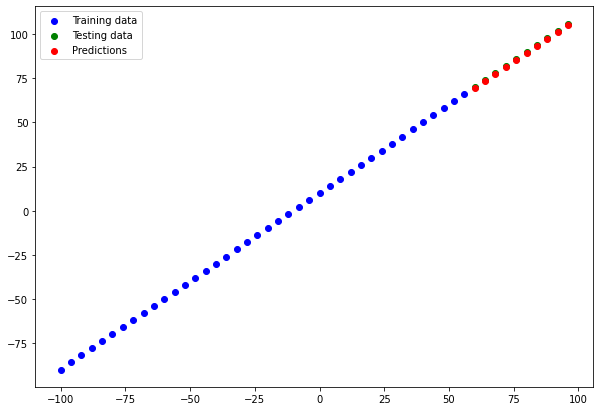

In [ ]:
plot_results(y_pred=y3_pred)

In [ ]:
mae_3 = mae(y_test, y3_pred)
mse_3 = mse(y_test, y3_pred)

In [ ]:
results = [['Model1', float(mae_1), float(mse_1)], ['Model2', float(mae_2), float(mse_2)], ['Model3', float(mae_3), float(mse_3)]]

In [ ]:
df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE'])
df

,Model,MAE,MSE
0,Model1,1.975776,4.040202
1,Model2,38.445858,1495.896362
2,Model3,0.430778,0.189083


In [ ]:
model3.summary()

Model: "my_model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input_layer (Dense)       (None, 100)               200       
_________________________________________________________________
my_hidden_layer (Dense)      (None, 10)                1010      
_________________________________________________________________
my_output_layer (Dense)      (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


### Tracking experiments
1. Tensor board (https://tensorboard.dev)
    - TensorBoard provides the visualization and tooling needed for machine learning experimentation:
    - Tracking and visualizing metrics such as loss and accuracy
    - Visualizing the model graph (ops and layers)
    - Viewing histograms of weights, biases, or other tensors as they change over time
    - Projecting embeddings to a lower dimensional space
    - Displaying images, text, and audio data
    - Profiling TensorFlow programs
    - And much more
2. Weights and Biases (https://wandb.ai/site)


### Saving our models
2 formats:
- The Savedmodel format
- HDF5 format

In [ ]:
model3.save('best_model_3') #Folder

INFO:tensorflow:Assets written to: best_model_3/assets


In [ ]:
model3.save('best_model_3.h5') #Single file

### Load model

In [ ]:
#Load savedModel format
loaded_model1 = tf.keras.models.load_model('best_model_3')

In [ ]:
loaded_model1.summary()

Model: "my_model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input_layer (Dense)       (None, 100)               200       
_________________________________________________________________
my_hidden_layer (Dense)      (None, 10)                1010      
_________________________________________________________________
my_output_layer (Dense)      (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_model2 = tf.keras.models.load_model('best_model_3.h5')

In [ ]:
loaded_model2.summary()

Model: "my_model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input_layer (Dense)       (None, 100)               200       
_________________________________________________________________
my_hidden_layer (Dense)      (None, 10)                1010      
_________________________________________________________________
my_output_layer (Dense)      (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare predictions from those models to check they are same
y_pred_1 = loaded_model1.predict(X_test)
y_pred_2 = loaded_model2.predict(X_test)

In [ ]:
y_pred_1==y_pred_2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
y3_pred == y_pred_2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A Larger example